<a href="https://colab.research.google.com/github/Edith0001/mid_first_team/blob/SEEUN_MID/%5B%EB%A9%8B%EC%82%AC%5D_MID_PROJECT(%EC%88%98%EC%A0%95%EC%A4%91).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    문제 : 탄소 배출량의 변화와 경제적·산업적 요인의 상관관계



1 경제 성장이 빠른 국가일수록 탄소 배출량 증가율이 높다.

- gdp (국내총생산)와 co2_growth_prct (탄소 배출 증가율)의 관계 분석
- 국가별 GDP 성장률이 탄소 배출량 증가에 미치는 영향을 확인

2 인구가 많은 국가일수록 탄소 배출량이 높다.

- population (인구 수)와 co2 (총 탄소 배출량)의 상관관계 분석
- 인구 증가가 탄소 배출 증가와 연관이 있는지 확인

3 산업화 수준이 높은 국가일수록 석탄·석유·가스 사용으로 인한 탄소 배출량이 많다.

- coal_co2, oil_co2, gas_co2 (연료별 탄소 배출량) 분석
- 선진국과 개발도상국 간 에너지원별 탄소 배출 패턴 차이 확인

4 재생에너지 사용 비율이 높은 국가일수록 탄소 배출량이 적다.

- energy_per_capita (1인당 에너지 소비)와 co2_per_capita (1인당 탄소 배출량)의 관계 분석
- 에너지 소비가 탄소 배출량 감소에 어떤 영향을 주는지 확인

5 무역을 많이 하는 국가일수록 탄소 배출량이 높다.

- trade_co2 (무역 관련 탄소 배출량)과 co2 (총 탄소 배출량)의 상관관계 분석
- 무역과 탄소 배출이 어떤 관계를 가지는지 확인

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("owid-co2-data.csv")

In [ ]:
# 데이터 크기 확인
print("데이터 크기:", df.shape)

# 컬럼 목록 확인
print("컬럼 목록:\n", df.columns)

데이터 크기: (50191, 79)
컬럼 목록:
 Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_

In [ ]:
# 데이터 샘플 확인
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 결측치 개수 확인
print("각 컬럼별 결측치 개수:\n", df.isnull().sum())

# 결측치 비율 확인
print("결측치 비율 (%):\n", (df.isnull().sum() / len(df)) * 100)

각 컬럼별 결측치 개수:
 country                            0
year                               0
iso_code                        7929
population                      9172
gdp                            34940
                               ...  
temperature_change_from_n2o    12131
total_ghg                      12781
total_ghg_excluding_lucf       12955
trade_co2                      45656
trade_co2_share                45656
Length: 79, dtype: int64
결측치 비율 (%):
 country                         0.000000
year                            0.000000
iso_code                       15.797653
population                     18.274193
gdp                            69.614074
                                 ...    
temperature_change_from_n2o    24.169672
total_ghg                      25.464725
total_ghg_excluding_lucf       25.811400
trade_co2                      90.964516
trade_co2_share                90.964516
Length: 79, dtype: float64


In [ ]:
# 선진국 & 개발도상국 구분 컬럼 추가
developed_countries = [
    "Austria", "Belgium", "Canada", "Denmark", "France", "Germany", "Greece",
    "Iceland", "Ireland", "Italy", "Luxembourg", "Netherlands", "Norway", "Portugal",
    "Spain", "Sweden", "Switzerland", "Turkey", "United Kingdom", "United States", "Japan",
    "Finland", "Australia", "New Zealand", "Mexico", "Czechia", "Hungary", "Poland",
    "South Korea", "Slovakia", "Chile", "Slovenia", "Estonia", "Israel", "Latvia",
    "Lithuania", "Colombia", "Costa Rica"
]

developing_countries = [
    "Afghanistan", "Angola", "Bangladesh", "Benin", "Burkina Faso", "Burundi",
    "Cambodia", "Central African Republic", "Chad", "Comoros", "Democratic Republic of the Congo",
    "Djibouti", "Eritrea", "Ethiopia", "Gambia", "Guinea", "Guinea-Bissau", "Haiti",
    "Kiribati", "Laos", "Lesotho", "Liberia", "Madagascar", "Malawi", "Mali",
    "Mauritania", "Mozambique", "Myanmar", "Nepal", "Niger", "Rwanda", "Senegal",
    "Sierra Leone", "Solomon Islands", "Somalia", "South Sudan", "Sudan", "Timor-Leste",
    "Togo", "Tuvalu", "Uganda", "Tanzania", "Yemen", "Zambia"
]

df["country_category"] = df["country"].apply(
    lambda x: "Developed" if x in developed_countries else "Developing" if x in developing_countries else "Other"
)


In [ ]:
# 산업화 수준을 반영한 지표 생성
df["fossil_fuel_co2"] = df["coal_co2"].fillna(0) + df["oil_co2"].fillna(0) + df["gas_co2"].fillna(0)


In [ ]:
# gdp - 중앙값 대체
df["gdp"] = df["gdp"].fillna(df["gdp"].median())

# population - 포워드 필 적용
df["population"] = df["population"].ffill()

# (필수 변수) 결측치 행 제거
df = df.dropna(subset=["co2", "co2_growth_prct", "total_ghg"])

In [ ]:
print(df[["gdp", "population"]].isnull().sum())

gdp           0
population    0
dtype: int64


In [ ]:
# 결측치 처리 데이터 크기 확인
print("결측치 처리 후 데이터 크기:", df.shape)

결측치 처리 후 데이터 크기: (23450, 81)


In [ ]:
# 분석에 필요한 컬럼만 선택
df_selected = df[[
    "country", "year", "country_category",  # 국가명, 연도, 선진국/개발도상국 구분
    "gdp", "co2_growth_prct",  # 경제 성장과 탄소 배출 증가율
    "population", "co2",  # 인구와 탄소 배출량
    "coal_co2", "oil_co2", "gas_co2", "fossil_fuel_co2",  # 산업화 수준과 화석연료 사용
    "total_ghg",  # 온실가스 배출량
    "energy_per_capita", "co2_per_capita",  # 재생에너지 사용과 탄소 배출
    "trade_co2"  # 무역 관련 탄소 배출
]]

In [ ]:
# 컬럼 확인
print("선택된 컬럼 목록:", df_selected.columns)
print("데이터 크기:", df_selected.shape)

선택된 컬럼 목록: Index(['country', 'year', 'country_category', 'gdp', 'co2_growth_prct',
       'population', 'co2', 'coal_co2', 'oil_co2', 'gas_co2',
       'fossil_fuel_co2', 'total_ghg', 'energy_per_capita', 'co2_per_capita',
       'trade_co2'],
      dtype='object')
데이터 크기: (23450, 15)


In [ ]:
# 결측치 개수 확인
print("각 컬럼별 결측치 개수:\n", df_selected.isnull().sum())

# 결측치 비율 확인
print("결측치 비율 (%):\n", (df_selected.isnull().sum() / len(df_selected)) * 100)

각 컬럼별 결측치 개수:
 country                  0
year                     0
country_category         0
gdp                      0
co2_growth_prct          0
population               0
co2                      0
coal_co2              4105
oil_co2               1301
gas_co2               7597
fossil_fuel_co2          0
total_ghg                0
energy_per_capita    13843
co2_per_capita          90
trade_co2            18950
dtype: int64
결측치 비율 (%):
 country               0.000000
year                  0.000000
country_category      0.000000
gdp                   0.000000
co2_growth_prct       0.000000
population            0.000000
co2                   0.000000
coal_co2             17.505330
oil_co2               5.547974
gas_co2              32.396588
fossil_fuel_co2       0.000000
total_ghg             0.000000
energy_per_capita    59.031983
co2_per_capita        0.383795
trade_co2            80.810235
dtype: float64


In [ ]:
# 복사본
df_selected = df[[
    "country", "year", "country_category",
    "gdp", "co2_growth_prct",
    "population", "co2",
    "coal_co2", "oil_co2", "gas_co2", "fossil_fuel_co2",
    "total_ghg", "energy_per_capita", "co2_per_capita",
    "trade_co2"
]].copy()

In [ ]:
# gdp - 중앙값 대체
df["gdp"] = df["gdp"].fillna(df["gdp"].median())

# population - 포워드 필 적용
df["population"] = df["population"].ffill()

# (필수 변수) 결측치가 있는 행 제거
df = df.dropna(subset=["co2", "co2_growth_prct", "total_ghg"])

In [ ]:
# 결측치 처리 데이터 크기 확인
print("결측치 처리 데이터 크기:", df_selected.shape)

결측치 처리 데이터 크기: (23450, 15)


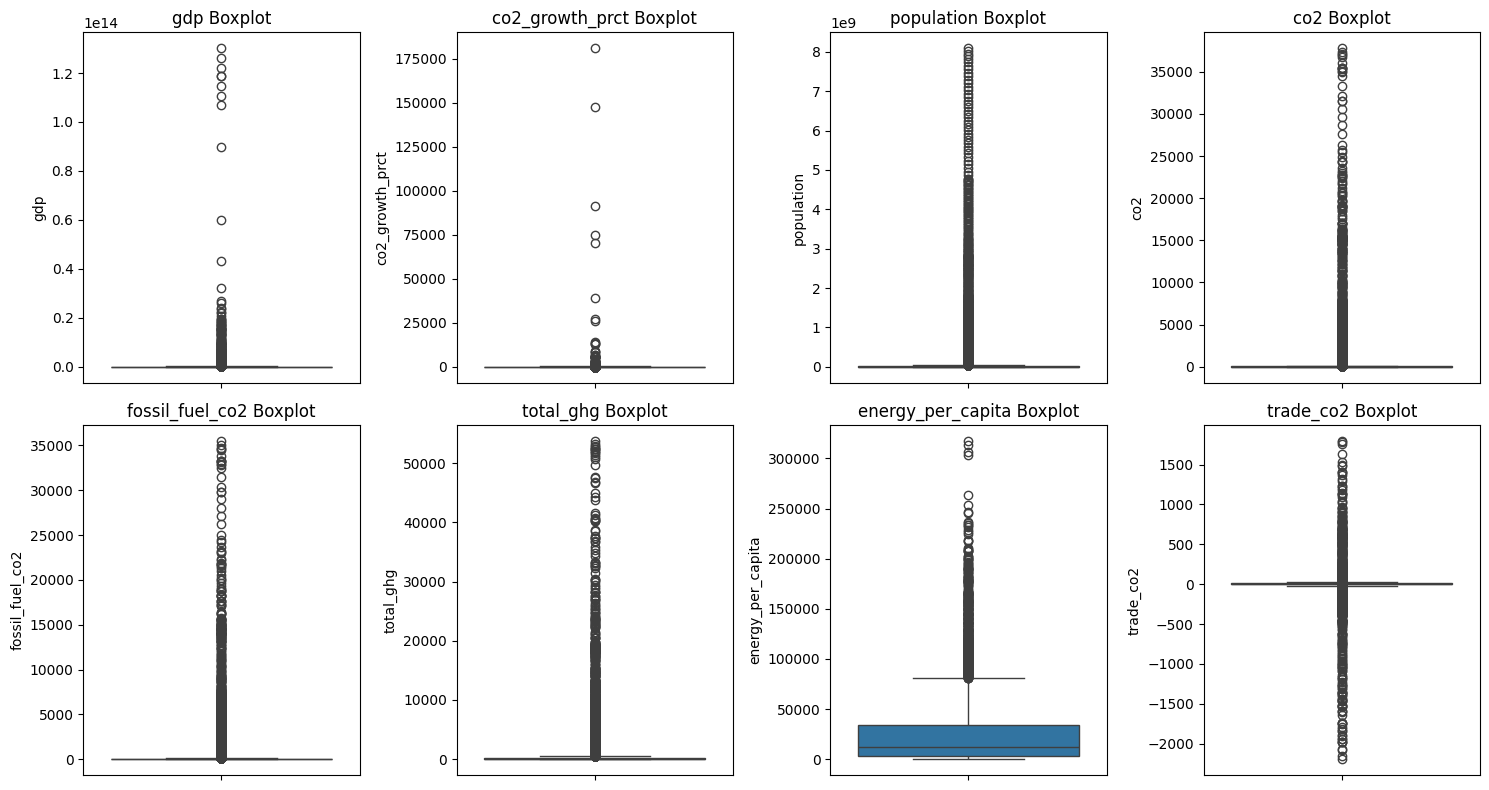

In [ ]:
# 이상치 확인할 컬럼
num_cols = ["gdp", "co2_growth_prct", "population", "co2",
            "fossil_fuel_co2", "total_ghg", "energy_per_capita", "trade_co2"]

# 이상치 시각화 (박스플롯)
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df_selected[col])
    plt.title(f"{col} Boxplot")

plt.tight_layout()
plt.show()

In [ ]:
# 로그 변환 적용 (0값 방지를 위해 log1p 사용)
df_selected["log_gdp"] = np.log1p(df_selected["gdp"])
df_selected["log_population"] = np.log1p(df_selected["population"])
df_selected["log_co2"] = np.log1p(df_selected["co2"])
df_selected["log_fossil_fuel_co2"] = np.log1p(df_selected["fossil_fuel_co2"])
df_selected["log_total_ghg"] = np.log1p(df_selected["total_ghg"])
df_selected["log_energy_per_capita"] = np.log1p(df_selected["energy_per_capita"])
df_selected["log_trade_co2"] = np.log1p(df_selected["trade_co2"].abs())  # 절댓값 후 로그 변환

# 로그 변환 데이터 확인
df_selected[["log_gdp", "log_population", "log_co2", "log_fossil_fuel_co2",
             "log_total_ghg", "log_energy_per_capita", "log_trade_co2"]].describe()


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,log_gdp,log_population,log_co2,log_fossil_fuel_co2,log_total_ghg,log_energy_per_capita,log_trade_co2
count,23450.000000,23450.000000,23450.000000,23450.000000,23427.000000,9607.000000,4500.000000
mean,24.173607,15.609150,2.542340,2.502077,3.955499,9.127963,2.540097
std,1.597838,2.260583,2.354660,2.343939,2.221917,1.712077,1.821835
min,17.874953,7.482682,0.000000,0.000000,-4.961845,0.000000,0.000000
25%,23.732483,14.462990,0.470004,0.454255,2.431330,7.984957,1.034785
50%,24.035217,15.465329,1.921032,1.853560,3.767436,9.427979,2.159119
75%,24.593540,16.866082,4.001096,3.933187,5.268878,10.440754,3.760229
max,32.499421,22.814109,10.539868,10.477602,10.893361,12.668477,7.694826


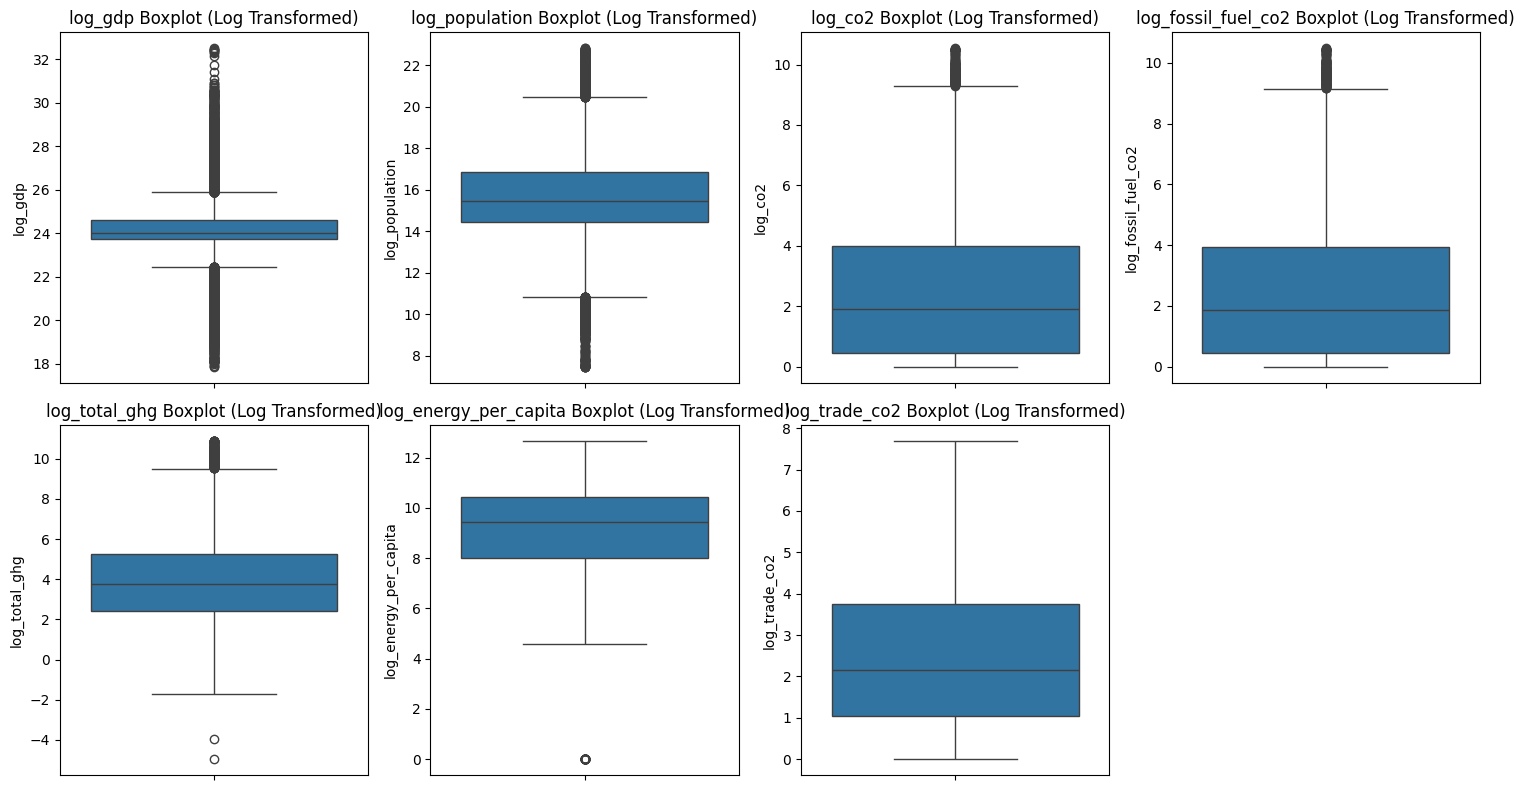

In [ ]:
# 로그 변환 변수
log_cols = ["log_gdp", "log_population", "log_co2", "log_fossil_fuel_co2",
            "log_total_ghg", "log_energy_per_capita", "log_trade_co2"]

# 이상치 시각화 (박스플롯)
plt.figure(figsize=(15, 8))
for i, col in enumerate(log_cols):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df_selected[col])
    plt.title(f"{col} Boxplot (Log Transformed)")

plt.tight_layout()
plt.show()



---



#시각화

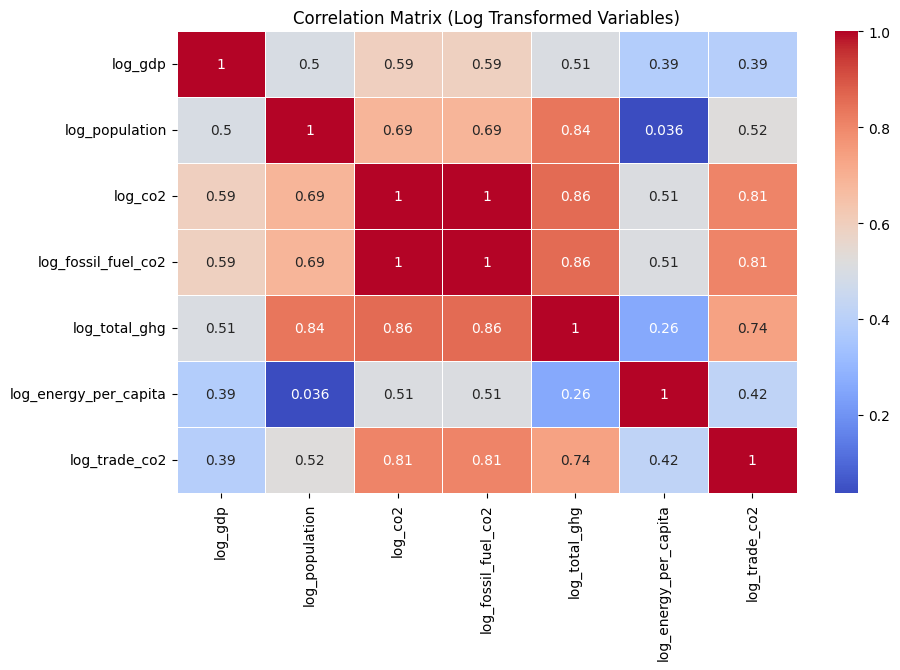

In [ ]:
corr_columns = ["log_gdp", "log_population", "log_co2", "log_fossil_fuel_co2",
                "log_total_ghg", "log_energy_per_capita", "log_trade_co2"]

# 상관계수
correlation_matrix = df_selected[corr_columns].corr()

# 시각화 (히트맵)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix (Log Transformed Variables)")
plt.show()

## 가설1. 경제 성장이 빠른 국가일수록 탄소 배출량 증가율이 높다

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


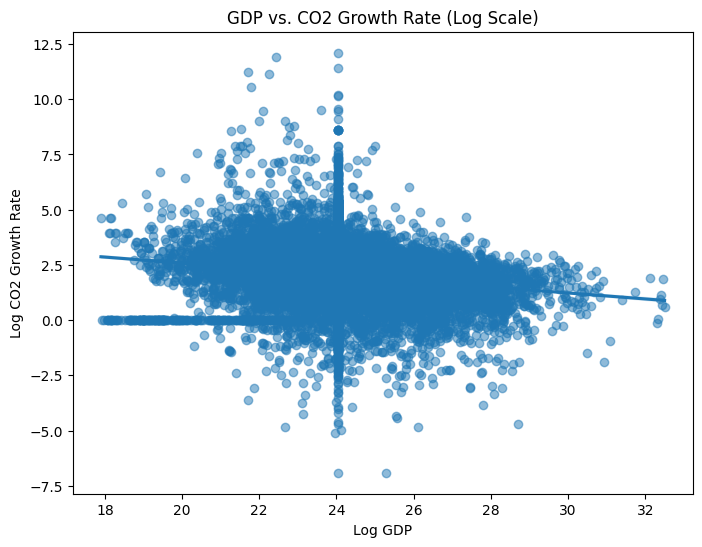

,log_gdp,log_co2_growth
log_gdp,1.000000,-0.163105
log_co2_growth,-0.163105,1.000000


In [ ]:
# 로그 변환 (왜곡 방지)
df["log_gdp"] = np.log1p(df["gdp"])
df["log_co2_growth"] = np.log1p(df["co2_growth_prct"])

# 산점도 및 회귀선
plt.figure(figsize=(8,6))
sns.regplot(x="log_gdp", y="log_co2_growth", data=df, scatter_kws={'alpha':0.5})
plt.title("GDP vs. CO2 Growth Rate (Log Scale)")
plt.xlabel("Log GDP")
plt.ylabel("Log CO2 Growth Rate")
plt.show()

# 상관관계 확인
df[["log_gdp", "log_co2_growth"]].corr()

#### GDP가 높을수록 탄소 배출 증가율이 낮아지는 경향이 있음 -> 가설 틀림

<할일>
색변환 해보기
다른 분들과 비교해보기

## 가설2. 인구가 많은 국가일수록 탄소 배출량이 높다

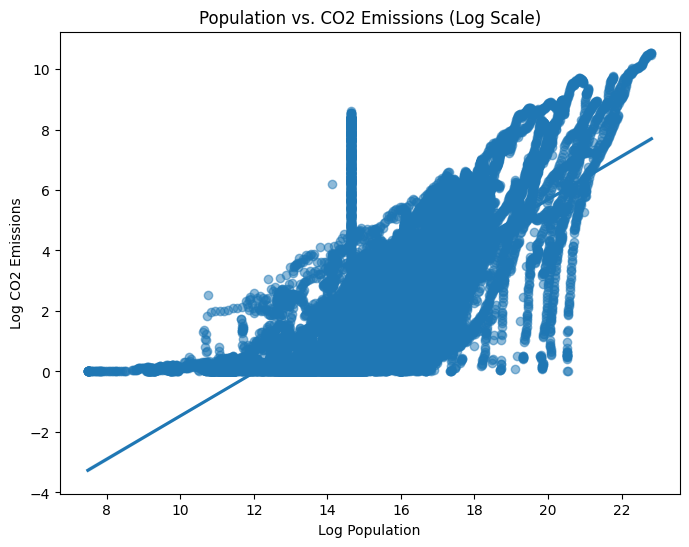

,log_population,log_co2
log_population,1.000000,0.686558
log_co2,0.686558,1.000000


In [ ]:
# 로그 변환
df["log_population"] = np.log1p(df["population"])
df["log_co2"] = np.log1p(df["co2"])

# 산점도 및 회귀선
plt.figure(figsize=(8,6))
sns.regplot(x="log_population", y="log_co2", data=df, scatter_kws={'alpha':0.5})
plt.title("Population vs. CO2 Emissions (Log Scale)")
plt.xlabel("Log Population")
plt.ylabel("Log CO2 Emissions")
plt.show()

# 상관관계 확인
df[["log_population", "log_co2"]].corr()

#### 너무 당연한 이야기라 ..

<
증감확인

## 가설3. 산업화 수준이 높은 국가일수록 석탄·석유·가스 사용으로 인한 탄소 배출량이 많다

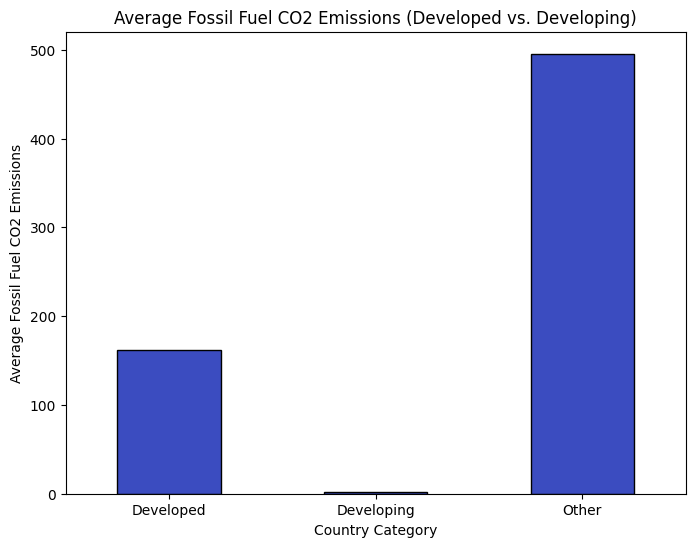

In [ ]:
# 개발도상국 & 선진국 평균 연료 기반 탄소 배출량 계산
df_grouped = df.groupby("country_category")["fossil_fuel_co2"].mean()

# 막대 그래프 시각화
df_grouped.plot(kind="bar", figsize=(8,6), colormap="coolwarm", edgecolor="black")

plt.title("Average Fossil Fuel CO2 Emissions (Developed vs. Developing)")
plt.xlabel("Country Category")
plt.ylabel("Average Fossil Fuel CO2 Emissions")
plt.xticks(rotation=0)
plt.show()


#### other 부분 데이터를 다시 살펴보고 처리할 필요가 있다고 생각

국가 재분류

## 가설4. 재생에너지 사용 비율이 높은 국가일수록 탄소 배출량이 적다

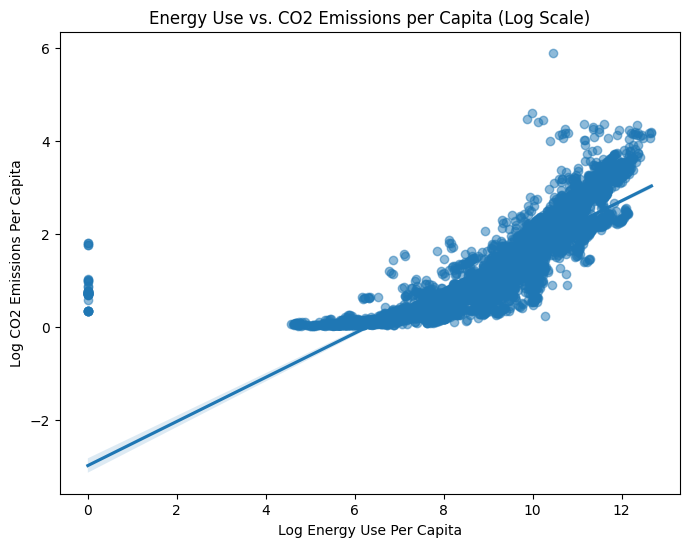

,log_energy_per_capita,log_co2_per_capita
log_energy_per_capita,1.000000,0.875547
log_co2_per_capita,0.875547,1.000000


In [ ]:
# 로그 변환
df["log_energy_per_capita"] = np.log1p(df["energy_per_capita"])
df["log_co2_per_capita"] = np.log1p(df["co2_per_capita"])

# 산점도 및 회귀선
plt.figure(figsize=(8,6))
sns.regplot(x="log_energy_per_capita", y="log_co2_per_capita", data=df, scatter_kws={'alpha':0.5})
plt.title("Energy Use vs. CO2 Emissions per Capita (Log Scale)")
plt.xlabel("Log Energy Use Per Capita")
plt.ylabel("Log CO2 Emissions Per Capita")
plt.show()

# 상관관계 확인
df[["log_energy_per_capita", "log_co2_per_capita"]].corr()

## 가설5. 무역을 많이 하는 국가일수록 탄소 배출량이 높다

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


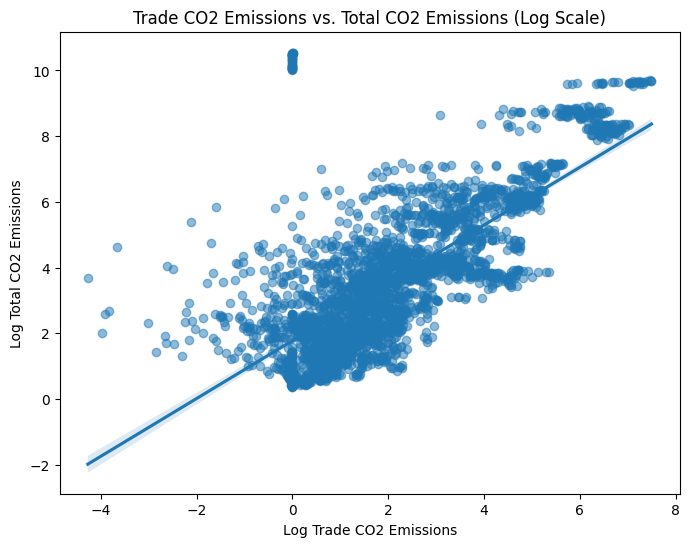

,log_trade_co2,log_co2
log_trade_co2,1.000000,0.724441
log_co2,0.724441,1.000000


In [ ]:
# 로그 변환
df["log_trade_co2"] = np.log1p(df["trade_co2"])

# 산점도 및 회귀선
plt.figure(figsize=(8,6))
sns.regplot(x="log_trade_co2", y="log_co2", data=df, scatter_kws={'alpha':0.5})
plt.title("Trade CO2 Emissions vs. Total CO2 Emissions (Log Scale)")
plt.xlabel("Log Trade CO2 Emissions")
plt.ylabel("Log Total CO2 Emissions")
plt.show()

# 상관관계 확인
df[["log_trade_co2", "log_co2"]].corr()

무역 많은 국가는 어떤 국가인지 정의 필요